In [101]:
# Hard reset notebook prior to running
%reset -f

In [102]:
%pip install pystan==2.18.0.0

Note: you may need to restart the kernel to use updated packages.


In [103]:
%pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
seed = 42

In [105]:
plt.rcParams["figure.figsize"] = (20,15)

In [106]:
def to_datetime(df, col):
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y')
    return df

def truncate_month(df, col):
    df['Truncated_Month'] = df[col].dt.strftime('01-%m-%Y')
    df = to_datetime(df, 'Truncated_Month')
    return df

def grouping_by(df, col1, col2, name):
    group_df = df.groupby([col1])[col2].count().reset_index(name=name)
    return group_df

In [107]:
performance_mensal = pd.read_csv('Perfomance-Monthly-2.csv')
performance_mensal

,Especificação\nSpecification,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,...,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2021,2021.1,Fev/Jan\nFeb/Jan
0,Especificação\nSpecification,Jan\nJan,Fev\nFeb,Mar\nMar,Abr\nApr,Mai\nMay,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,...,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,Out\nOct,Nov\nNov,Dez\nDec,Jan\nJan,Fev\nFeb,Fev/Jan\nFeb/Jan
1,Produção / Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
3,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
4,Planos / Flat Products,"1,202","1,144","1,262","1,233","1,311","1,285","1,251","1,271","1,230",...,879,829,998,"1,097","1,225","1,082","1,253","1,294","1,211",-6.4
5,Longos / Long Products,849,799,933,979,"1,043",999,"1,001",987,952,...,673,807,826,854,900,863,837,873,839,-3.9
6,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
7,Placas / Slabs,395,418,435,387,346,266,368,395,424,...,606,702,582,412,545,692,573,597,538,-9.9
8,"Blocos e Tarugos / Ingots, Blooms and Billets",76,63,115,73,96,64,111,106,90,...,106,73,46,44,66,18,43,24,19,-21.1
9,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5


In [108]:
performance_mensal.columns

Index(['Especificação\nSpecification', '2013', '2013.1', '2013.2', '2013.3',
       '2013.4', '2013.5', '2013.6', '2013.7', '2013.8', '2013.9', '2013.10',
       '2013.11', '2014', '2014.1', '2014.2', '2014.3', '2014.4', '2014.5',
       '2014.6', '2014.7', '2014.8', '2014.9', '2014.10', '2014.11', '2015',
       '2015.1', '2015.2', '2015.3', '2015.4', '2015.5', '2015.6', '2015.7',
       '2015.8', '2015.9', '2015.10', '2015.11', '2016', '2016.1', '2016.2',
       '2016.3', '2016.4', '2016.5', '2016.6', '2016.7', '2016.8', '2016.9',
       '2016.10', '2016.11', '2017', '2017.1', '2017.2', '2017.3', '2017.4',
       '2017.5', '2017.6', '2017.7', '2017.8', '2017.9', '2017.10', '2017.11',
       '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2018.8', '2018.9', '2018.10', '2018.11', '2019', '2019.1',
       '2019.2', '2019.3', '2019.4', '2019.5', '2019.6', '2019.7', '2019.8',
       '2019.9', '2019.10', '2019.11', '2020', '2020.1', '2020.2', '2020.3',

In [109]:
new_columns = {'2013': '01-01-2013', 
               '2013.1': '01-02-2013', 
               '2013.2': '01-03-2013', 
               '2013.3': '01-04-2013',
               '2013.4': '01-05-2013', 
               '2013.5': '01-06-2013', 
               '2013.6': '01-07-2013', 
               '2013.7': '01-08-2013', 
               '2013.8': '01-09-2013', 
               '2013.9': '01-10-2013', 
               '2013.10': '01-11-2013',
               '2013.11': '01-12-2013', 
               '2014': '01-01-2014', 
               '2014.1': '01-02-2014', 
               '2014.2': '01-03-2014', 
               '2014.3': '01-04-2014', 
               '2014.4': '01-05-2014', 
               '2014.5': '01-06-2014',
               '2014.6': '01-07-2014', 
               '2014.7': '01-08-2014', 
               '2014.8': '01-09-2014', 
               '2014.9': '01-10-2014', 
               '2014.10': '01-11-2014', 
               '2014.11': '01-12-2014', 
               '2015': '01-01-2015',
               '2015.1': '01-02-2015', 
               '2015.2': '01-03-2015', 
               '2015.3': '01-04-2015', 
               '2015.4': '01-05-2015', 
               '2015.5': '01-06-2015', 
               '2015.6': '01-07-2015', 
               '2015.7': '01-08-2015',
               '2015.8': '01-09-2015', 
               '2015.9': '01-10-2015', 
               '2015.10': '01-11-2015', 
               '2015.11': '01-12-2015', 
               '2016': '01-01-2016', 
               '2016.1': '01-02-2016', 
               '2016.2': '01-03-2016',
               '2016.3': '01-04-2016', 
               '2016.4': '01-05-2016', 
               '2016.5': '01-06-2016', 
               '2016.6': '01-07-2016', 
               '2016.7': '01-08-2016', 
               '2016.8': '01-09-2016', 
               '2016.9': '01-10-2016',
               '2016.10': '01-11-2016', 
               '2016.11': '01-12-2016', 
               '2017': '01-01-2017', 
               '2017.1': '01-02-2017', 
               '2017.2': '01-03-2017', 
               '2017.3': '01-04-2017', 
               '2017.4': '01-05-2017',
               '2017.5': '01-06-2017', 
               '2017.6': '01-07-2017', 
               '2017.7': '01-08-2017', 
               '2017.8': '01-09-2017', 
               '2017.9': '01-10-2017', 
               '2017.10': '01-11-2017', 
               '2017.11': '01-12-2017',
               '2018': '01-01-2018', 
               '2018.1': '01-02-2018', 
               '2018.2': '01-03-2018', 
               '2018.3': '01-04-2018', 
               '2018.4': '01-05-2018', 
               '2018.5': '01-06-2018', 
               '2018.6': '01-07-2018',
               '2018.7': '01-08-2018', 
               '2018.8': '01-09-2018', 
               '2018.9': '01-10-2018', 
               '2018.10': '01-11-2018', 
               '2018.11': '01-12-2018', 
               '2019': '01-01-2019', 
               '2019.1': '01-02-2019',
               '2019.2': '01-03-2019', 
               '2019.3': '01-04-2019', 
               '2019.4': '01-05-2019', 
               '2019.5': '01-06-2019', 
               '2019.6': '01-07-2019', 
               '2019.7': '01-08-2019', 
               '2019.8': '01-09-2019',
               '2019.9': '01-10-2019', 
               '2019.10': '01-11-2019', 
               '2019.11': '01-12-2019', 
               '2020': '01-01-2020', 
               '2020.1': '01-02-2020', 
               '2020.2': '01-03-2020', 
               '2020.3': '01-04-2020',
               '2020.4': '01-05-2020', 
               '2020.5': '01-06-2020', 
               '2020.6': '01-07-2020', 
               '2020.7': '01-08-2020', 
               '2020.8': '01-09-2020', 
               '2020.9': '01-10-2020', 
               '2020.10': '01-11-2020',
               '2020.11': '01-12-2020', 
               '2021': '01-01-2021', 
               '2021.1': '01-02-2021'}

In [110]:
performance_mensal.rename(columns = new_columns, inplace = True)
performance_mensal

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Especificação\nSpecification,Jan\nJan,Fev\nFeb,Mar\nMar,Abr\nApr,Mai\nMay,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,...,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,Out\nOct,Nov\nNov,Dez\nDec,Jan\nJan,Fev\nFeb,Fev/Jan\nFeb/Jan
1,Produção / Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
3,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
4,Planos / Flat Products,"1,202","1,144","1,262","1,233","1,311","1,285","1,251","1,271","1,230",...,879,829,998,"1,097","1,225","1,082","1,253","1,294","1,211",-6.4
5,Longos / Long Products,849,799,933,979,"1,043",999,"1,001",987,952,...,673,807,826,854,900,863,837,873,839,-3.9
6,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
7,Placas / Slabs,395,418,435,387,346,266,368,395,424,...,606,702,582,412,545,692,573,597,538,-9.9
8,"Blocos e Tarugos / Ingots, Blooms and Billets",76,63,115,73,96,64,111,106,90,...,106,73,46,44,66,18,43,24,19,-21.1
9,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5


In [111]:
producao_df = performance_mensal.loc[2:23].copy()
producao_df.reset_index(drop=True, inplace=True)
producao_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
1,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
2,Planos / Flat Products,"1,202","1,144","1,262","1,233","1,311","1,285","1,251","1,271","1,230",...,879,829,998,"1,097","1,225","1,082","1,253","1,294","1,211",-6.4
3,Longos / Long Products,849,799,933,979,"1,043",999,"1,001",987,952,...,673,807,826,854,900,863,837,873,839,-3.9
4,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
5,Placas / Slabs,395,418,435,387,346,266,368,395,424,...,606,702,582,412,545,692,573,597,538,-9.9
6,"Blocos e Tarugos / Ingots, Blooms and Billets",76,63,115,73,96,64,111,106,90,...,106,73,46,44,66,18,43,24,19,-21.1
7,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5
8,Vendas Internas / Domestic Sales (*),"1,906","1,792","2,063","2,074","2,193","2,123","2,096","2,226","2,112",...,"1,552","1,729","1,729","1,871","1,930","1,833","1,827","1,924","1,883",-2.1
9,Laminados / Rolled Products,"1,853","1,754","2,006","2,010","2,129","2,080","2,044","2,182","2,054",...,"1,507","1,698","1,707","1,848","1,894","1,795","1,790","1,894","1,847",-2.5


In [112]:
exportacoes_df = performance_mensal.loc[26:33].copy()
exportacoes_df.reset_index(drop=True, inplace=True)
exportacoes_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Laminados / Rolled Products,331,316,209,293,254,223,201,191,199,...,250,214,145,239,205,147,225,165,148,-10.5
1,Planos / Flat Products,212,208,124,184,148,112,105,78,110,...,136,107,68,119,98,49,90,46,58,26.9
2,Longos / Long Products,119,109,85,109,106,111,96,113,88,...,114,107,76,121,107,98,135,119,90,-24.9
3,Semiacabados P/ Vendas /\nSemifinished Product...,602,499,510,525,354,320,267,391,434,...,825,661,696,517,638,367,541,366,618,68.8
4,Placas / Slabs,548,454,471,462,322,271,236,355,383,...,790,618,629,478,631,365,538,363,618,69.9
5,"Blocos e Tarugos / Ingots, Blooms and Billets",54,45,38,62,32,49,32,36,51,...,35,44,67,39,7,2,3,2,0,-98.1
6,Total (Mil t / Thousand Tonnes),933,815,719,817,608,543,468,582,633,...,"1,076",875,841,756,842,514,766,531,766,44.1
7,(US$ Milhões / US$ Millions),574,510,474,540,508,386,346,440,417,...,479,392,380,379,416,299,434,314,522,66.3


In [113]:
filtered_exportacoes_df = exportacoes_df.drop([1, 2, 4, 5])
filtered_exportacoes_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Laminados / Rolled Products,331,316,209,293,254,223,201,191,199,...,250,214,145,239,205,147,225,165,148,-10.5
3,Semiacabados P/ Vendas /\nSemifinished Product...,602,499,510,525,354,320,267,391,434,...,825,661,696,517,638,367,541,366,618,68.8
6,Total (Mil t / Thousand Tonnes),933,815,719,817,608,543,468,582,633,...,"1,076",875,841,756,842,514,766,531,766,44.1
7,(US$ Milhões / US$ Millions),574,510,474,540,508,386,346,440,417,...,479,392,380,379,416,299,434,314,522,66.3


In [114]:
filtered_exportacoes_df.set_index('Especificação\nSpecification', inplace=True)

In [115]:
transposed_exportacoes_df = filtered_exportacoes_df.transpose()
transposed_exportacoes_df.reset_index(inplace=True)
transposed_exportacoes_df

Especificação Specification,index,Laminados / Rolled Products,Semiacabados P/ Vendas /\nSemifinished Products for Sale,Total (Mil t / Thousand Tonnes),(US$ Milhões / US$ Millions)
0,01-01-2013,331,602,933,574
1,01-02-2013,316,499,815,510
2,01-03-2013,209,510,719,474
3,01-04-2013,293,525,817,540
4,01-05-2013,254,354,608,508
...,...,...,...,...,...
94,01-11-2020,147,367,514,299
95,01-12-2020,225,541,766,434
96,01-01-2021,165,366,531,314
97,01-02-2021,148,618,766,522


In [116]:
transposed_exportacoes_df.drop([98], inplace =True)
transposed_exportacoes_df

Especificação Specification,index,Laminados / Rolled Products,Semiacabados P/ Vendas /\nSemifinished Products for Sale,Total (Mil t / Thousand Tonnes),(US$ Milhões / US$ Millions)
0,01-01-2013,331,602,933,574
1,01-02-2013,316,499,815,510
2,01-03-2013,209,510,719,474
3,01-04-2013,293,525,817,540
4,01-05-2013,254,354,608,508
...,...,...,...,...,...
93,01-10-2020,205,638,842,416
94,01-11-2020,147,367,514,299
95,01-12-2020,225,541,766,434
96,01-01-2021,165,366,531,314


In [117]:
transposed_exportacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   index                                                    98 non-null     object
 1   Laminados / Rolled Products                              98 non-null     object
 2   Semiacabados P/ Vendas /
Semifinished Products for Sale  98 non-null     object
 3   Total (Mil t / Thousand Tonnes)                          98 non-null     object
 4   (US$ Milhões / US$ Millions)                             98 non-null     object
dtypes: object(5)
memory usage: 4.6+ KB


In [118]:
transposed_exportacoes_df.columns

Index(['index', 'Laminados / Rolled Products',
       'Semiacabados P/ Vendas /\nSemifinished Products for Sale',
       'Total (Mil t / Thousand Tonnes)', '(US$ Milhões / US$ Millions)'],
      dtype='object', name='Especificação\nSpecification')

In [119]:
for c in ['Laminados / Rolled Products', 'Semiacabados P/ Vendas /\nSemifinished Products for Sale', 'Total (Mil t / Thousand Tonnes)', '(US$ Milhões / US$ Millions)']:
  transposed_exportacoes_df[c]=transposed_exportacoes_df[c].str.replace(',','')



for c in ['Laminados / Rolled Products', 'Semiacabados P/ Vendas /\nSemifinished Products for Sale', 'Total (Mil t / Thousand Tonnes)', '(US$ Milhões / US$ Millions)']:
  transposed_exportacoes_df[c] = transposed_exportacoes_df[c].astype(float)
transposed_exportacoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   index                                                    98 non-null     object 
 1   Laminados / Rolled Products                              98 non-null     float64
 2   Semiacabados P/ Vendas /
Semifinished Products for Sale  98 non-null     float64
 3   Total (Mil t / Thousand Tonnes)                          98 non-null     float64
 4   (US$ Milhões / US$ Millions)                             98 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

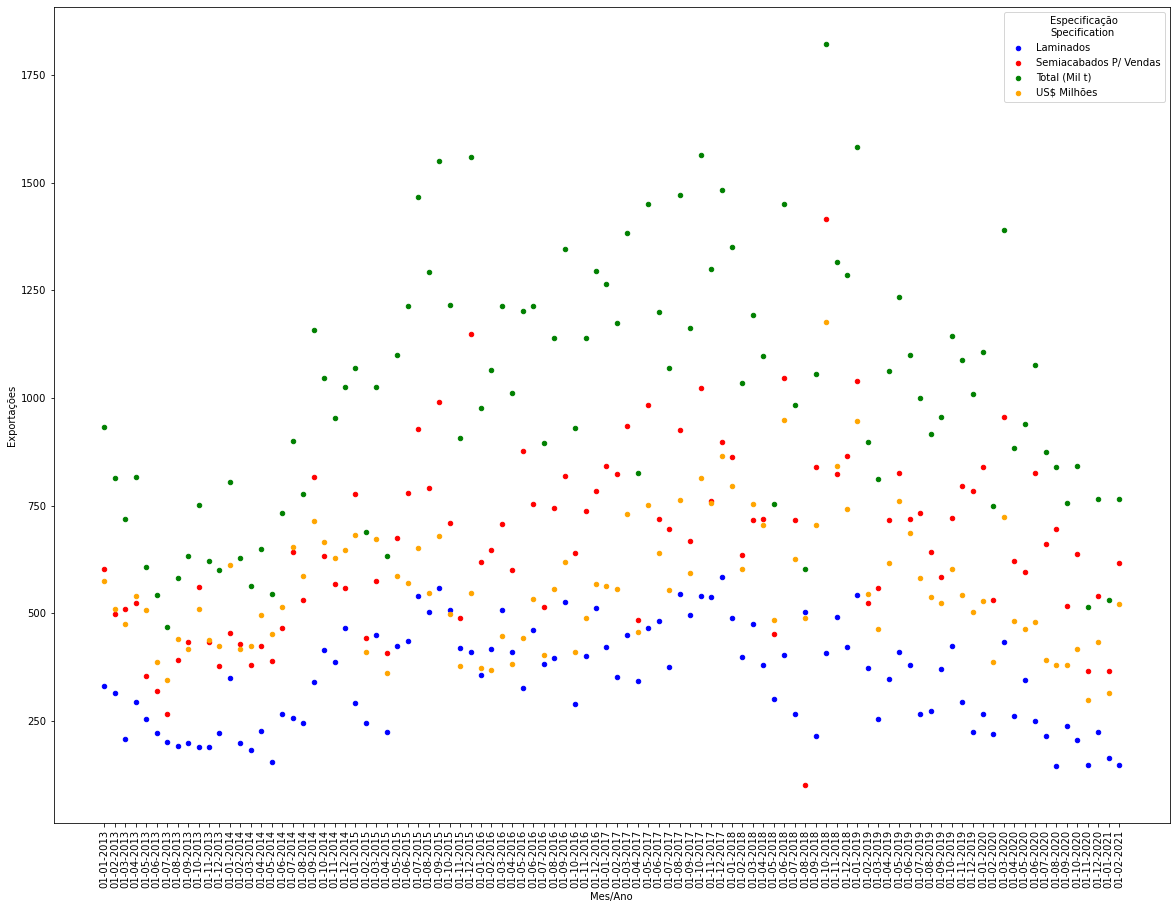

In [120]:
ax = transposed_exportacoes_df.plot(kind="scatter", x="index",y="Laminados / Rolled Products", color="b", label="Laminados")
transposed_exportacoes_df.plot(kind="scatter", x="index",y="Semiacabados P/ Vendas /\nSemifinished Products for Sale", color="r", label="Semiacabados P/ Vendas", ax=ax)
transposed_exportacoes_df.plot(kind="scatter", x="index",y="Total (Mil t / Thousand Tonnes)", color="g", label="Total (Mil t)", ax=ax)
transposed_exportacoes_df.plot(kind="scatter", x="index",y="(US$ Milhões / US$ Millions)", color="orange", label="US$ Milhões", ax=ax)

ax.set_xlabel("Mes/Ano")
ax.set_ylabel("Exportações")
plt.xticks(rotation=90) 
plt.show()

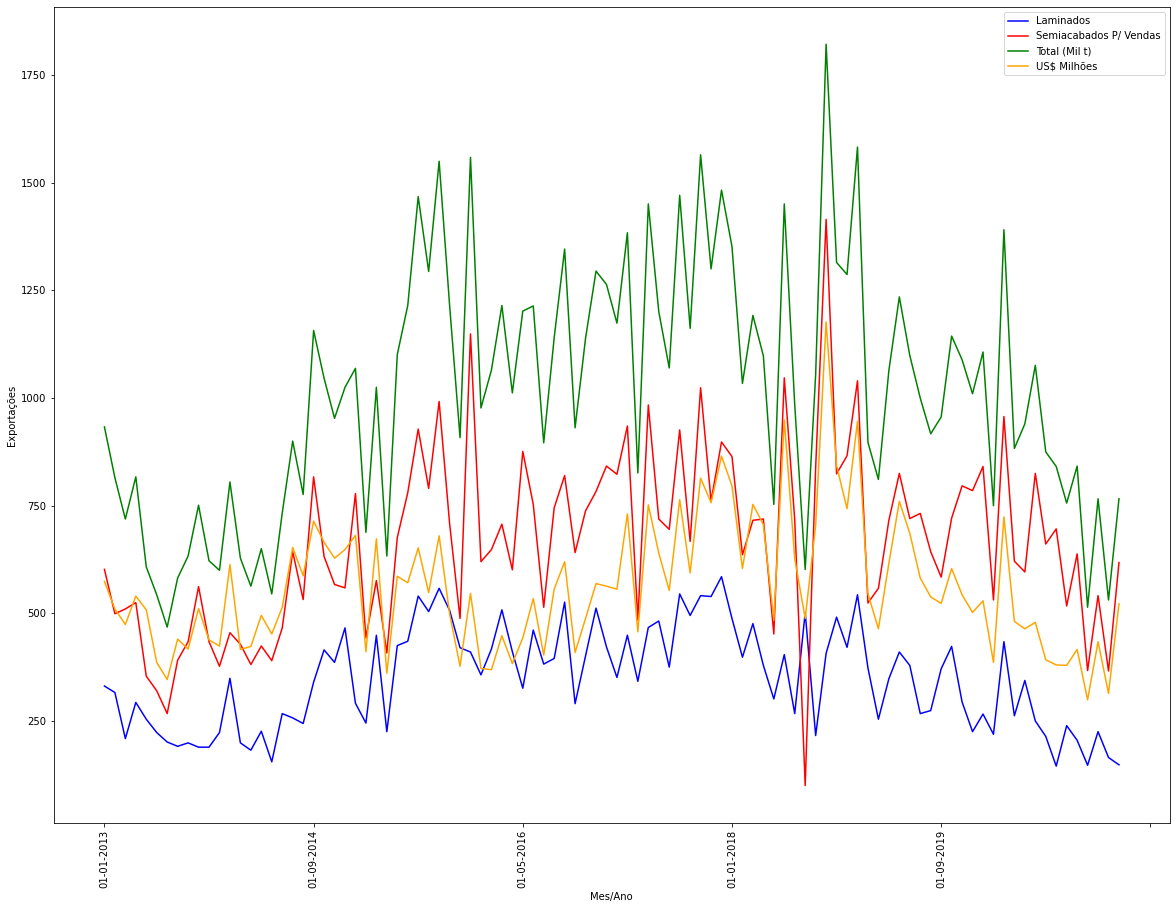

In [121]:
ax = transposed_exportacoes_df.plot(x="index",y="Laminados / Rolled Products", color="b", label="Laminados")
transposed_exportacoes_df.plot(x="index",y="Semiacabados P/ Vendas /\nSemifinished Products for Sale", color="r", label="Semiacabados P/ Vendas", ax=ax)
transposed_exportacoes_df.plot(x="index",y="Total (Mil t / Thousand Tonnes)", color="g", label="Total (Mil t)", ax=ax)
transposed_exportacoes_df.plot(x="index",y="(US$ Milhões / US$ Millions)", color="orange", label="US$ Milhões", ax=ax)

ax.set_xlabel("Mes/Ano")
ax.set_ylabel("Exportações")
plt.xticks(rotation=90) 
plt.show()

In [122]:
transposed_exportacoes_df.sort_values(by="Total (Mil t / Thousand Tonnes)", ascending=False)

Especificação Specification,index,Laminados / Rolled Products,Semiacabados P/ Vendas /\nSemifinished Products for Sale,Total (Mil t / Thousand Tonnes),(US$ Milhões / US$ Millions)
69,01-10-2018,407.0,1415.0,1822.0,1177.0
72,01-01-2019,543.0,1040.0,1583.0,946.0
57,01-10-2017,541.0,1024.0,1565.0,814.0
35,01-12-2015,410.0,1149.0,1559.0,546.0
32,01-09-2015,558.0,992.0,1550.0,680.0
...,...,...,...,...,...
16,01-05-2014,155.0,390.0,545.0,452.0
5,01-06-2013,223.0,320.0,543.0,386.0
96,01-01-2021,165.0,366.0,531.0,314.0
94,01-11-2020,147.0,367.0,514.0,299.0


In [123]:
performance_mensal 

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Especificação\nSpecification,Jan\nJan,Fev\nFeb,Mar\nMar,Abr\nApr,Mai\nMay,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,...,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,Out\nOct,Nov\nNov,Dez\nDec,Jan\nJan,Fev\nFeb,Fev/Jan\nFeb/Jan
1,Produção / Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
3,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
4,Planos / Flat Products,"1,202","1,144","1,262","1,233","1,311","1,285","1,251","1,271","1,230",...,879,829,998,"1,097","1,225","1,082","1,253","1,294","1,211",-6.4
5,Longos / Long Products,849,799,933,979,"1,043",999,"1,001",987,952,...,673,807,826,854,900,863,837,873,839,-3.9
6,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
7,Placas / Slabs,395,418,435,387,346,266,368,395,424,...,606,702,582,412,545,692,573,597,538,-9.9
8,"Blocos e Tarugos / Ingots, Blooms and Billets",76,63,115,73,96,64,111,106,90,...,106,73,46,44,66,18,43,24,19,-21.1
9,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5


In [124]:
consumo_aparente = performance_mensal.loc[41].copy()
consumo_aparente = pd.DataFrame(consumo_aparente)
consumo_aparente

,41
Especificação\nSpecification,Consumo Aparente / Apparent Consumption (***)
01-01-2013,"2,168"
01-02-2013,"2,070"
01-03-2013,"2,331"
01-04-2013,"2,403"
...,...
01-11-2020,"2,034"
01-12-2020,"2,032"
01-01-2021,"2,211"
01-02-2021,"2,125"


In [125]:
consumo_aparente_calculado = performance_mensal.loc[41].copy()
consumo_aparente_calculado = pd.DataFrame(consumo_aparente)
consumo_aparente_calculado

,41
Especificação\nSpecification,Consumo Aparente / Apparent Consumption (***)
01-01-2013,"2,168"
01-02-2013,"2,070"
01-03-2013,"2,331"
01-04-2013,"2,403"
...,...
01-11-2020,"2,034"
01-12-2020,"2,032"
01-01-2021,"2,211"
01-02-2021,"2,125"


In [126]:
consumo_aparente.reset_index(inplace=True)
consumo_aparente

,index,41
0,Especificação\nSpecification,Consumo Aparente / Apparent Consumption (***)
1,01-01-2013,"2,168"
2,01-02-2013,"2,070"
3,01-03-2013,"2,331"
4,01-04-2013,"2,403"
...,...,...
95,01-11-2020,"2,034"
96,01-12-2020,"2,032"
97,01-01-2021,"2,211"
98,01-02-2021,"2,125"


In [127]:
consumo_aparente.columns

Index(['index', 41], dtype='object')

In [128]:
consumo_aparente.rename(columns = {'index': 'Datas', 41: 'Valores'}, inplace = True)
consumo_aparente

,Datas,Valores
0,Especificação\nSpecification,Consumo Aparente / Apparent Consumption (***)
1,01-01-2013,"2,168"
2,01-02-2013,"2,070"
3,01-03-2013,"2,331"
4,01-04-2013,"2,403"
...,...,...
95,01-11-2020,"2,034"
96,01-12-2020,"2,032"
97,01-01-2021,"2,211"
98,01-02-2021,"2,125"


In [129]:
consumo_aparente.drop([0], inplace=True)
consumo_aparente.reset_index(drop=True, inplace = True)
consumo_aparente

,Datas,Valores
0,01-01-2013,"2,168"
1,01-02-2013,"2,070"
2,01-03-2013,"2,331"
3,01-04-2013,"2,403"
4,01-05-2013,"2,457"
...,...,...
94,01-11-2020,"2,034"
95,01-12-2020,"2,032"
96,01-01-2021,"2,211"
97,01-02-2021,"2,125"


In [130]:
consumo_aparente.drop([98], inplace=True)
consumo_aparente

,Datas,Valores
0,01-01-2013,"2,168"
1,01-02-2013,"2,070"
2,01-03-2013,"2,331"
3,01-04-2013,"2,403"
4,01-05-2013,"2,457"
...,...,...
93,01-10-2020,"2,073"
94,01-11-2020,"2,034"
95,01-12-2020,"2,032"
96,01-01-2021,"2,211"


In [131]:
consumo_aparente['Valores']=consumo_aparente['Valores'].str.replace(',','')
consumo_aparente['Valores'] = consumo_aparente['Valores'].astype('float')
consumo_aparente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Datas    98 non-null     object 
 1   Valores  98 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


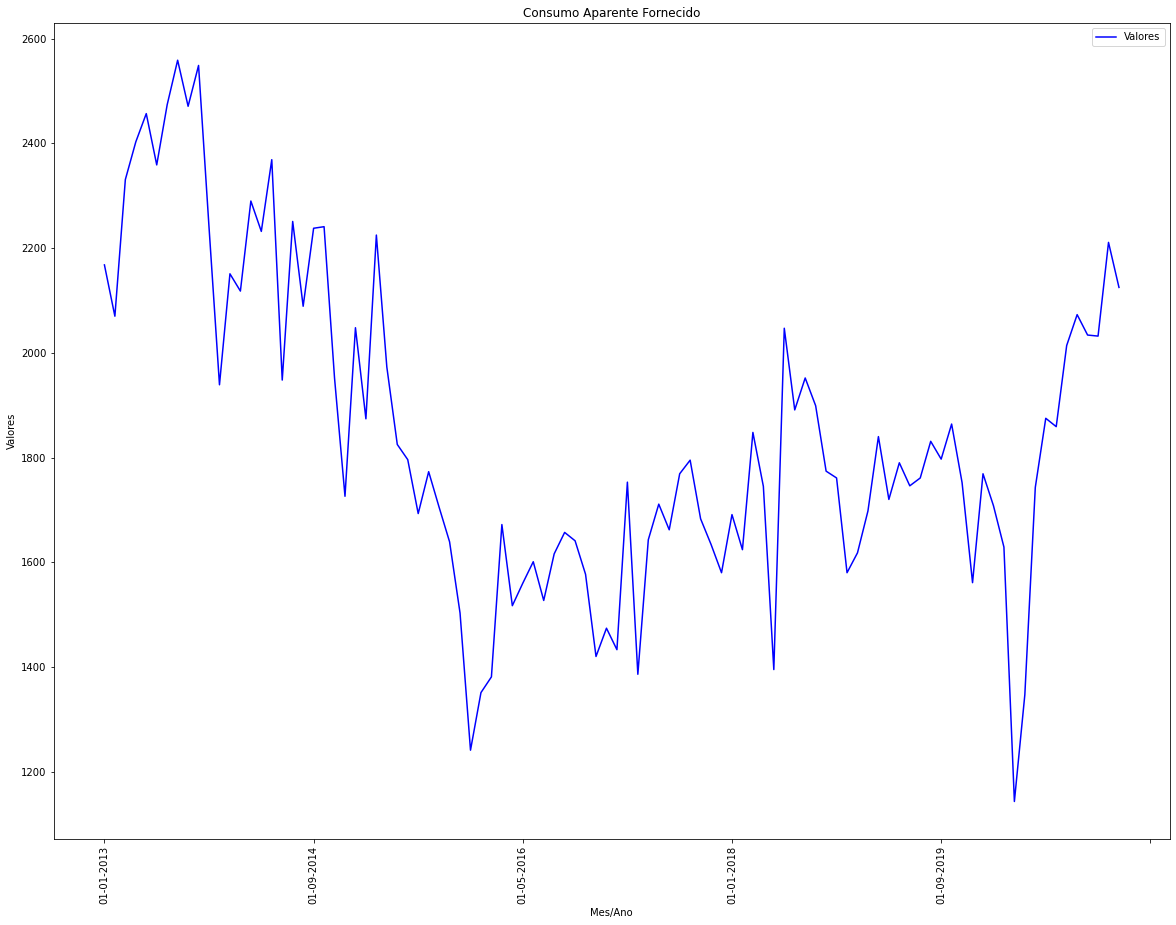

In [132]:
ax = consumo_aparente.plot(x="Datas",y="Valores", color="b")
ax.set_xlabel("Mes/Ano")
ax.set_ylabel("Valores")
plt.title("Consumo Aparente Fornecido")
plt.xticks(rotation=90) 
plt.show()

In [133]:
producao_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
1,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
2,Planos / Flat Products,"1,202","1,144","1,262","1,233","1,311","1,285","1,251","1,271","1,230",...,879,829,998,"1,097","1,225","1,082","1,253","1,294","1,211",-6.4
3,Longos / Long Products,849,799,933,979,"1,043",999,"1,001",987,952,...,673,807,826,854,900,863,837,873,839,-3.9
4,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
5,Placas / Slabs,395,418,435,387,346,266,368,395,424,...,606,702,582,412,545,692,573,597,538,-9.9
6,"Blocos e Tarugos / Ingots, Blooms and Billets",76,63,115,73,96,64,111,106,90,...,106,73,46,44,66,18,43,24,19,-21.1
7,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5
8,Vendas Internas / Domestic Sales (*),"1,906","1,792","2,063","2,074","2,193","2,123","2,096","2,226","2,112",...,"1,552","1,729","1,729","1,871","1,930","1,833","1,827","1,924","1,883",-2.1
9,Laminados / Rolled Products,"1,853","1,754","2,006","2,010","2,129","2,080","2,044","2,182","2,054",...,"1,507","1,698","1,707","1,848","1,894","1,795","1,790","1,894","1,847",-2.5


In [134]:
producao_new = producao_df.drop([2,3,5,6,9,10,11,12,13,14,16,17,18,19,20,21])
producao_new

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
1,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
4,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
7,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5
8,Vendas Internas / Domestic Sales (*),"1,906","1,792","2,063","2,074","2,193","2,123","2,096","2,226","2,112",...,"1,552","1,729","1,729","1,871","1,930","1,833","1,827","1,924","1,883",-2.1
15,Vendas Externas / Foreign Market (**),717,629,748,597,492,555,443,591,663,...,"1,003",925,841,628,792,660,921,566,657,16.2


In [135]:
performance_mensal

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Especificação\nSpecification,Jan\nJan,Fev\nFeb,Mar\nMar,Abr\nApr,Mai\nMay,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,...,Jun\nJun,Jul\nJul,Ago\nAug,Set\nSep,Out\nOct,Nov\nNov,Dez\nDec,Jan\nJan,Fev\nFeb,Fev/Jan\nFeb/Jan
1,Produção / Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
3,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
4,Planos / Flat Products,"1,202","1,144","1,262","1,233","1,311","1,285","1,251","1,271","1,230",...,879,829,998,"1,097","1,225","1,082","1,253","1,294","1,211",-6.4
5,Longos / Long Products,849,799,933,979,"1,043",999,"1,001",987,952,...,673,807,826,854,900,863,837,873,839,-3.9
6,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
7,Placas / Slabs,395,418,435,387,346,266,368,395,424,...,606,702,582,412,545,692,573,597,538,-9.9
8,"Blocos e Tarugos / Ingots, Blooms and Billets",76,63,115,73,96,64,111,106,90,...,106,73,46,44,66,18,43,24,19,-21.1
9,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5


In [136]:
result_df = performance_mensal.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43])
result_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
39,Total (Mil t / Thousand Tonnes),279,294,271,330,266,240,382,337,364,...,190,146,129,142,163,199,204,324,334,2.9


In [137]:
minus_df = performance_mensal.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43])
minus_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
32,Total (Mil t / Thousand Tonnes),933,815,719,817,608,543,468,582,633,...,"1,076",875,841,756,842,514,766,531,766,44.1


In [138]:
result_df = pd.concat([producao_new, result_df])
result_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021,Fev/Jan\nFeb/Jan
0,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845",-5.3
1,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050",-5.4
4,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,713,775,628,456,610,709,616,621,557,-10.3
7,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248",-7.5
8,Vendas Internas / Domestic Sales (*),"1,906","1,792","2,063","2,074","2,193","2,123","2,096","2,226","2,112",...,"1,552","1,729","1,729","1,871","1,930","1,833","1,827","1,924","1,883",-2.1
15,Vendas Externas / Foreign Market (**),717,629,748,597,492,555,443,591,663,...,"1,003",925,841,628,792,660,921,566,657,16.2
39,Total (Mil t / Thousand Tonnes),279,294,271,330,266,240,382,337,364,...,190,146,129,142,163,199,204,324,334,2.9


In [139]:
result_df.columns

Index(['Especificação\nSpecification', '01-01-2013', '01-02-2013',
       '01-03-2013', '01-04-2013', '01-05-2013', '01-06-2013', '01-07-2013',
       '01-08-2013', '01-09-2013', '01-10-2013', '01-11-2013', '01-12-2013',
       '01-01-2014', '01-02-2014', '01-03-2014', '01-04-2014', '01-05-2014',
       '01-06-2014', '01-07-2014', '01-08-2014', '01-09-2014', '01-10-2014',
       '01-11-2014', '01-12-2014', '01-01-2015', '01-02-2015', '01-03-2015',
       '01-04-2015', '01-05-2015', '01-06-2015', '01-07-2015', '01-08-2015',
       '01-09-2015', '01-10-2015', '01-11-2015', '01-12-2015', '01-01-2016',
       '01-02-2016', '01-03-2016', '01-04-2016', '01-05-2016', '01-06-2016',
       '01-07-2016', '01-08-2016', '01-09-2016', '01-10-2016', '01-11-2016',
       '01-12-2016', '01-01-2017', '01-02-2017', '01-03-2017', '01-04-2017',
       '01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017', '01-09-2017',
       '01-10-2017', '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018',
       '0

In [140]:
result_df.drop(columns=['Fev/Jan\nFeb/Jan'], inplace=True)
minus_df.drop(columns=['Fev/Jan\nFeb/Jan'], inplace=True)
result_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-05-2020,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021
0,Aço Bruto / Crude Steel,"2,769","2,575","2,859","2,914","3,000","2,837","2,918","2,977","2,981",...,"2,251","2,139","2,570","2,705","2,592","2,784","2,954","2,886","3,004","2,845"
1,Laminados / Rolled Products,"2,051","1,943","2,194","2,212","2,355","2,284","2,252","2,258","2,182",...,"1,435","1,552","1,635","1,823","1,951","2,125","1,945","2,090","2,167","2,050"
4,Semiacabados P/ Vendas /\nSemifinished Product...,470,481,551,460,442,330,479,501,514,...,630,713,775,628,456,610,709,616,621,557
7,Ferro-Gusa / Pig Iron,"2,178","2,000","2,158","2,240","2,240","2,123","2,213","2,308","2,244",...,"1,724","1,687","1,990","2,121","1,990","2,139","2,325","2,339","2,430","2,248"
8,Vendas Internas / Domestic Sales (*),"1,906","1,792","2,063","2,074","2,193","2,123","2,096","2,226","2,112",...,"1,198","1,552","1,729","1,729","1,871","1,930","1,833","1,827","1,924","1,883"
15,Vendas Externas / Foreign Market (**),717,629,748,597,492,555,443,591,663,...,966,"1,003",925,841,628,792,660,921,566,657
39,Total (Mil t / Thousand Tonnes),279,294,271,330,266,240,382,337,364,...,149,190,146,129,142,163,199,204,324,334


In [141]:
result_df.columns

Index(['Especificação\nSpecification', '01-01-2013', '01-02-2013',
       '01-03-2013', '01-04-2013', '01-05-2013', '01-06-2013', '01-07-2013',
       '01-08-2013', '01-09-2013', '01-10-2013', '01-11-2013', '01-12-2013',
       '01-01-2014', '01-02-2014', '01-03-2014', '01-04-2014', '01-05-2014',
       '01-06-2014', '01-07-2014', '01-08-2014', '01-09-2014', '01-10-2014',
       '01-11-2014', '01-12-2014', '01-01-2015', '01-02-2015', '01-03-2015',
       '01-04-2015', '01-05-2015', '01-06-2015', '01-07-2015', '01-08-2015',
       '01-09-2015', '01-10-2015', '01-11-2015', '01-12-2015', '01-01-2016',
       '01-02-2016', '01-03-2016', '01-04-2016', '01-05-2016', '01-06-2016',
       '01-07-2016', '01-08-2016', '01-09-2016', '01-10-2016', '01-11-2016',
       '01-12-2016', '01-01-2017', '01-02-2017', '01-03-2017', '01-04-2017',
       '01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017', '01-09-2017',
       '01-10-2017', '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018',
       '0

In [142]:
for c in ['01-01-2013', '01-02-2013', '01-03-2013',
       '01-04-2013', '01-05-2013', '01-06-2013', '01-07-2013', '01-08-2013', '01-09-2013',
       '01-10-2013', '01-11-2013', '01-12-2013', '01-01-2014', '01-02-2014', '01-03-2014',
       '01-04-2014', '01-05-2014', '01-06-2014', '01-07-2014', '01-08-2014', '01-09-2014',
       '01-10-2014', '01-11-2014', '01-12-2014', '01-01-2015', '01-02-2015', '01-03-2015',
       '01-04-2015', '01-05-2015', '01-06-2015', '01-07-2015', '01-08-2015', '01-09-2015',
       '01-10-2015', '01-11-2015', '01-12-2015', '01-01-2016', '01-02-2016', '01-03-2016',
       '01-04-2016', '01-05-2016', '01-06-2016', '01-07-2016', '01-08-2016', '01-09-2016',
       '01-10-2016', '01-11-2016', '01-12-2016', '01-01-2017', '01-02-2017', '01-03-2017',
       '01-04-2017', '01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017', '01-09-2017',
       '01-10-2017', '01-11-2017', '01-12-2017', '01-01-2018', '01-02-2018', '01-03-2018',
       '01-04-2018', '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018', '01-09-2018',
       '01-10-2018', '01-11-2018', '01-12-2018', '01-01-2019', '01-02-2019', '01-03-2019',
       '01-04-2019', '01-05-2019', '01-06-2019', '01-07-2019', '01-08-2019', '01-09-2019',
       '01-10-2019', '01-11-2019', '01-12-2019', '01-01-2020', '01-02-2020', '01-03-2020',
       '01-04-2020', '01-05-2020', '01-06-2020', '01-07-2020', '01-08-2020', '01-09-2020',
       '01-10-2020', '01-11-2020', '01-12-2020', '01-01-2021', '01-02-2021']:
  result_df[c]=result_df[c].str.replace(',','')
  result_df[c] = result_df[c].astype('float')
  minus_df[c]=minus_df[c].str.replace(',','')
  minus_df[c] = minus_df[c].astype('float')
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 39
Data columns (total 99 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Especificação
Specification  7 non-null      object 
 1   01-01-2013                   7 non-null      float64
 2   01-02-2013                   7 non-null      float64
 3   01-03-2013                   7 non-null      float64
 4   01-04-2013                   7 non-null      float64
 5   01-05-2013                   7 non-null      float64
 6   01-06-2013                   7 non-null      float64
 7   01-07-2013                   7 non-null      float64
 8   01-08-2013                   7 non-null      float64
 9   01-09-2013                   7 non-null      float64
 10  01-10-2013                   7 non-null      float64
 11  01-11-2013                   7 non-null      float64
 12  01-12-2013                   7 non-null      float64
 13  01-01-2014             

In [143]:
result_df

,Especificação\nSpecification,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,...,01-05-2020,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021
0,Aço Bruto / Crude Steel,2769.0,2575.0,2859.0,2914.0,3000.0,2837.0,2918.0,2977.0,2981.0,...,2251.0,2139.0,2570.0,2705.0,2592.0,2784.0,2954.0,2886.0,3004.0,2845.0
1,Laminados / Rolled Products,2051.0,1943.0,2194.0,2212.0,2355.0,2284.0,2252.0,2258.0,2182.0,...,1435.0,1552.0,1635.0,1823.0,1951.0,2125.0,1945.0,2090.0,2167.0,2050.0
4,Semiacabados P/ Vendas /\nSemifinished Product...,470.0,481.0,551.0,460.0,442.0,330.0,479.0,501.0,514.0,...,630.0,713.0,775.0,628.0,456.0,610.0,709.0,616.0,621.0,557.0
7,Ferro-Gusa / Pig Iron,2178.0,2000.0,2158.0,2240.0,2240.0,2123.0,2213.0,2308.0,2244.0,...,1724.0,1687.0,1990.0,2121.0,1990.0,2139.0,2325.0,2339.0,2430.0,2248.0
8,Vendas Internas / Domestic Sales (*),1906.0,1792.0,2063.0,2074.0,2193.0,2123.0,2096.0,2226.0,2112.0,...,1198.0,1552.0,1729.0,1729.0,1871.0,1930.0,1833.0,1827.0,1924.0,1883.0
15,Vendas Externas / Foreign Market (**),717.0,629.0,748.0,597.0,492.0,555.0,443.0,591.0,663.0,...,966.0,1003.0,925.0,841.0,628.0,792.0,660.0,921.0,566.0,657.0
39,Total (Mil t / Thousand Tonnes),279.0,294.0,271.0,330.0,266.0,240.0,382.0,337.0,364.0,...,149.0,190.0,146.0,129.0,142.0,163.0,199.0,204.0,324.0,334.0


In [144]:
result_df.set_index('Especificação\nSpecification', inplace=True)
result_df

,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,01-10-2013,...,01-05-2020,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021
Especificação Specification,,,,,,,,,,,,,,,,,,,,,
Aço Bruto / Crude Steel,2769.0,2575.0,2859.0,2914.0,3000.0,2837.0,2918.0,2977.0,2981.0,2980.0,...,2251.0,2139.0,2570.0,2705.0,2592.0,2784.0,2954.0,2886.0,3004.0,2845.0
Laminados / Rolled Products,2051.0,1943.0,2194.0,2212.0,2355.0,2284.0,2252.0,2258.0,2182.0,2309.0,...,1435.0,1552.0,1635.0,1823.0,1951.0,2125.0,1945.0,2090.0,2167.0,2050.0
Semiacabados P/ Vendas /\nSemifinished Products for Sale,470.0,481.0,551.0,460.0,442.0,330.0,479.0,501.0,514.0,458.0,...,630.0,713.0,775.0,628.0,456.0,610.0,709.0,616.0,621.0,557.0
Ferro-Gusa / Pig Iron,2178.0,2000.0,2158.0,2240.0,2240.0,2123.0,2213.0,2308.0,2244.0,2248.0,...,1724.0,1687.0,1990.0,2121.0,1990.0,2139.0,2325.0,2339.0,2430.0,2248.0
Vendas Internas / Domestic Sales (*),1906.0,1792.0,2063.0,2074.0,2193.0,2123.0,2096.0,2226.0,2112.0,2141.0,...,1198.0,1552.0,1729.0,1729.0,1871.0,1930.0,1833.0,1827.0,1924.0,1883.0
Vendas Externas / Foreign Market (**),717.0,629.0,748.0,597.0,492.0,555.0,443.0,591.0,663.0,543.0,...,966.0,1003.0,925.0,841.0,628.0,792.0,660.0,921.0,566.0,657.0
Total (Mil t / Thousand Tonnes),279.0,294.0,271.0,330.0,266.0,240.0,382.0,337.0,364.0,413.0,...,149.0,190.0,146.0,129.0,142.0,163.0,199.0,204.0,324.0,334.0


In [145]:
transposed_result_df = result_df.transpose()
transposed_result_df

Especificação Specification,Aço Bruto / Crude Steel,Laminados / Rolled Products,Semiacabados P/ Vendas /\nSemifinished Products for Sale,Ferro-Gusa / Pig Iron,Vendas Internas / Domestic Sales (*),Vendas Externas / Foreign Market (**),Total (Mil t / Thousand Tonnes)
01-01-2013,2769.0,2051.0,470.0,2178.0,1906.0,717.0,279.0
01-02-2013,2575.0,1943.0,481.0,2000.0,1792.0,629.0,294.0
01-03-2013,2859.0,2194.0,551.0,2158.0,2063.0,748.0,271.0
01-04-2013,2914.0,2212.0,460.0,2240.0,2074.0,597.0,330.0
01-05-2013,3000.0,2355.0,442.0,2240.0,2193.0,492.0,266.0
...,...,...,...,...,...,...,...
01-10-2020,2784.0,2125.0,610.0,2139.0,1930.0,792.0,163.0
01-11-2020,2954.0,1945.0,709.0,2325.0,1833.0,660.0,199.0
01-12-2020,2886.0,2090.0,616.0,2339.0,1827.0,921.0,204.0
01-01-2021,3004.0,2167.0,621.0,2430.0,1924.0,566.0,324.0


In [146]:
transposed_result_df.columns

Index(['Aço Bruto / Crude Steel', 'Laminados / Rolled Products',
       'Semiacabados P/ Vendas /\nSemifinished Products for Sale',
       'Ferro-Gusa / Pig Iron', 'Vendas Internas / Domestic Sales (*)',
       'Vendas Externas / Foreign Market (**)',
       'Total (Mil t / Thousand Tonnes)'],
      dtype='object', name='Especificação\nSpecification')

In [147]:
transposed_result_df['Soma'] = transposed_result_df['Aço Bruto / Crude Steel'] + transposed_result_df['Laminados / Rolled Products'] + transposed_result_df['Semiacabados P/ Vendas /\nSemifinished Products for Sale'] + transposed_result_df['Ferro-Gusa / Pig Iron'] + transposed_result_df['Vendas Internas / Domestic Sales (*)'] + transposed_result_df['Vendas Externas / Foreign Market (**)'] + transposed_result_df['Total (Mil t / Thousand Tonnes)']
transposed_result_df

Especificação Specification,Aço Bruto / Crude Steel,Laminados / Rolled Products,Semiacabados P/ Vendas /\nSemifinished Products for Sale,Ferro-Gusa / Pig Iron,Vendas Internas / Domestic Sales (*),Vendas Externas / Foreign Market (**),Total (Mil t / Thousand Tonnes),Soma
01-01-2013,2769.0,2051.0,470.0,2178.0,1906.0,717.0,279.0,10370.0
01-02-2013,2575.0,1943.0,481.0,2000.0,1792.0,629.0,294.0,9714.0
01-03-2013,2859.0,2194.0,551.0,2158.0,2063.0,748.0,271.0,10844.0
01-04-2013,2914.0,2212.0,460.0,2240.0,2074.0,597.0,330.0,10827.0
01-05-2013,3000.0,2355.0,442.0,2240.0,2193.0,492.0,266.0,10988.0
...,...,...,...,...,...,...,...,...
01-10-2020,2784.0,2125.0,610.0,2139.0,1930.0,792.0,163.0,10543.0
01-11-2020,2954.0,1945.0,709.0,2325.0,1833.0,660.0,199.0,10625.0
01-12-2020,2886.0,2090.0,616.0,2339.0,1827.0,921.0,204.0,10883.0
01-01-2021,3004.0,2167.0,621.0,2430.0,1924.0,566.0,324.0,11036.0


In [148]:
filtered_result_df = transposed_result_df[['Soma']].copy()
filtered_result_df.reset_index(inplace=True)
filtered_result_df

Especificação Specification,index,Soma
0,01-01-2013,10370.0
1,01-02-2013,9714.0
2,01-03-2013,10844.0
3,01-04-2013,10827.0
4,01-05-2013,10988.0
...,...,...
93,01-10-2020,10543.0
94,01-11-2020,10625.0
95,01-12-2020,10883.0
96,01-01-2021,11036.0


In [149]:
minus_df.set_index('Especificação\nSpecification', inplace=True)
minus_df

,01-01-2013,01-02-2013,01-03-2013,01-04-2013,01-05-2013,01-06-2013,01-07-2013,01-08-2013,01-09-2013,01-10-2013,...,01-05-2020,01-06-2020,01-07-2020,01-08-2020,01-09-2020,01-10-2020,01-11-2020,01-12-2020,01-01-2021,01-02-2021
Especificação Specification,,,,,,,,,,,,,,,,,,,,,
Total (Mil t / Thousand Tonnes),933.0,815.0,719.0,817.0,608.0,543.0,468.0,582.0,633.0,751.0,...,940.0,1076.0,875.0,841.0,756.0,842.0,514.0,766.0,531.0,766.0


In [150]:
transposed_minus_df = minus_df.transpose()
transposed_minus_df.reset_index(inplace=True)
transposed_minus_df

Especificação Specification,index,Total (Mil t / Thousand Tonnes)
0,01-01-2013,933.0
1,01-02-2013,815.0
2,01-03-2013,719.0
3,01-04-2013,817.0
4,01-05-2013,608.0
...,...,...
93,01-10-2020,842.0
94,01-11-2020,514.0
95,01-12-2020,766.0
96,01-01-2021,531.0


In [151]:
merged_df = filtered_result_df.merge(transposed_minus_df, 'left')
merged_df

Especificação Specification,index,Soma,Total (Mil t / Thousand Tonnes)
0,01-01-2013,10370.0,933.0
1,01-02-2013,9714.0,815.0
2,01-03-2013,10844.0,719.0
3,01-04-2013,10827.0,817.0
4,01-05-2013,10988.0,608.0
...,...,...,...
93,01-10-2020,10543.0,842.0
94,01-11-2020,10625.0,514.0
95,01-12-2020,10883.0,766.0
96,01-01-2021,11036.0,531.0


In [152]:
merged_df.set_index('index',inplace=True)
merged_df.columns

Index(['Soma', 'Total (Mil t / Thousand Tonnes)'], dtype='object', name='Especificação\nSpecification')

In [153]:
merged_df

Especificação Specification,Soma,Total (Mil t / Thousand Tonnes)
index,,
01-01-2013,10370.0,933.0
01-02-2013,9714.0,815.0
01-03-2013,10844.0,719.0
01-04-2013,10827.0,817.0
01-05-2013,10988.0,608.0
...,...,...
01-10-2020,10543.0,842.0
01-11-2020,10625.0,514.0
01-12-2020,10883.0,766.0


In [154]:
merged_df['total_final'] = merged_df['Soma'] - merged_df['Total (Mil t / Thousand Tonnes)']
merged_df

Especificação Specification,Soma,Total (Mil t / Thousand Tonnes),total_final
index,,,
01-01-2013,10370.0,933.0,9437.0
01-02-2013,9714.0,815.0,8899.0
01-03-2013,10844.0,719.0,10125.0
01-04-2013,10827.0,817.0,10010.0
01-05-2013,10988.0,608.0,10380.0
...,...,...,...
01-10-2020,10543.0,842.0,9701.0
01-11-2020,10625.0,514.0,10111.0
01-12-2020,10883.0,766.0,10117.0


In [155]:
merged_df.reset_index(inplace=True)
merged_df

Especificação Specification,index,Soma,Total (Mil t / Thousand Tonnes),total_final
0,01-01-2013,10370.0,933.0,9437.0
1,01-02-2013,9714.0,815.0,8899.0
2,01-03-2013,10844.0,719.0,10125.0
3,01-04-2013,10827.0,817.0,10010.0
4,01-05-2013,10988.0,608.0,10380.0
...,...,...,...,...
93,01-10-2020,10543.0,842.0,9701.0
94,01-11-2020,10625.0,514.0,10111.0
95,01-12-2020,10883.0,766.0,10117.0
96,01-01-2021,11036.0,531.0,10505.0


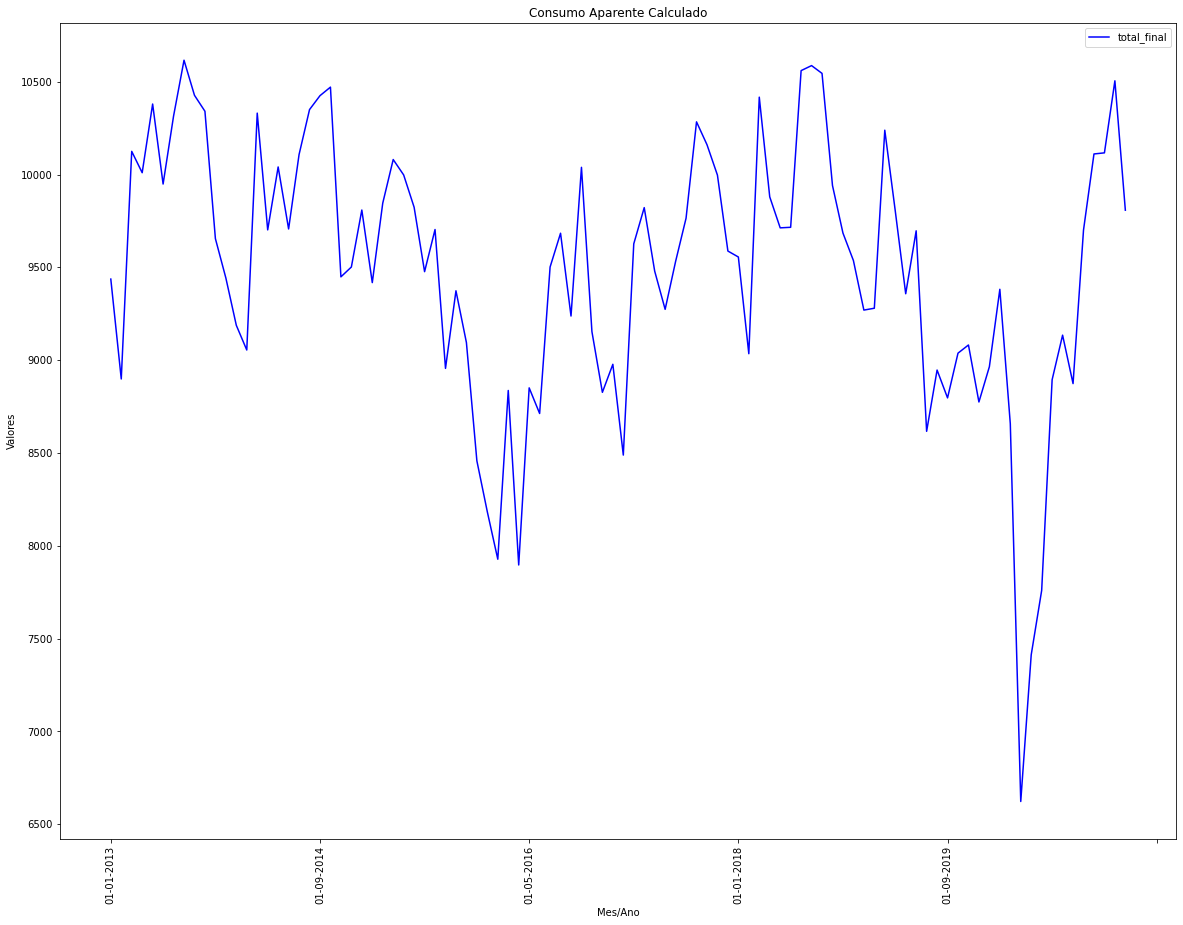

In [156]:
ax = merged_df.plot(x="index",y="total_final", color="b")
ax.set_xlabel("Mes/Ano")
ax.set_ylabel("Valores")
plt.title("Consumo Aparente Calculado")
plt.xticks(rotation=90) 
plt.show()

Projeção do consumo aparente usando os dados já disponibilizados para o Consumo aparente

In [157]:
consumo_aparente.columns

Index(['Datas', 'Valores'], dtype='object')

In [158]:
consumo_aparente = to_datetime(consumo_aparente, 'Datas')

In [159]:
consumo_aparente.dtypes

Datas      datetime64[ns]
Valores           float64
dtype: object

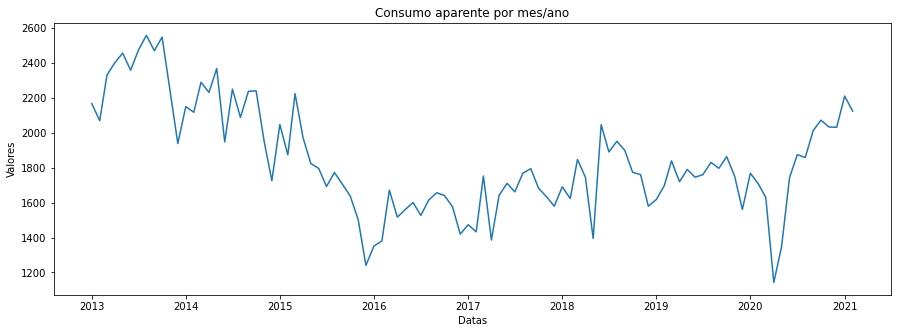

In [160]:
f, axes = plt.subplots(1, figsize=(15,5))

sns.lineplot(x="Datas", y="Valores",data=consumo_aparente)

plt.title("Consumo aparente por mes/ano")

plt.show()

Removendo os outliers

In [161]:
daily_prices_remOutliers = consumo_aparente[['Datas','Valores']]
size = consumo_aparente.size
y = daily_prices_remOutliers['Valores']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

print(str(y[removed_outliers].size) + "/" + str(size) + " dados remanescentes.")

print(str((100-(y[removed_outliers].size/size)*100)) +  " % percentual correspondente.")



88/196 dados remanescentes.
55.10204081632653 % percentual correspondente.


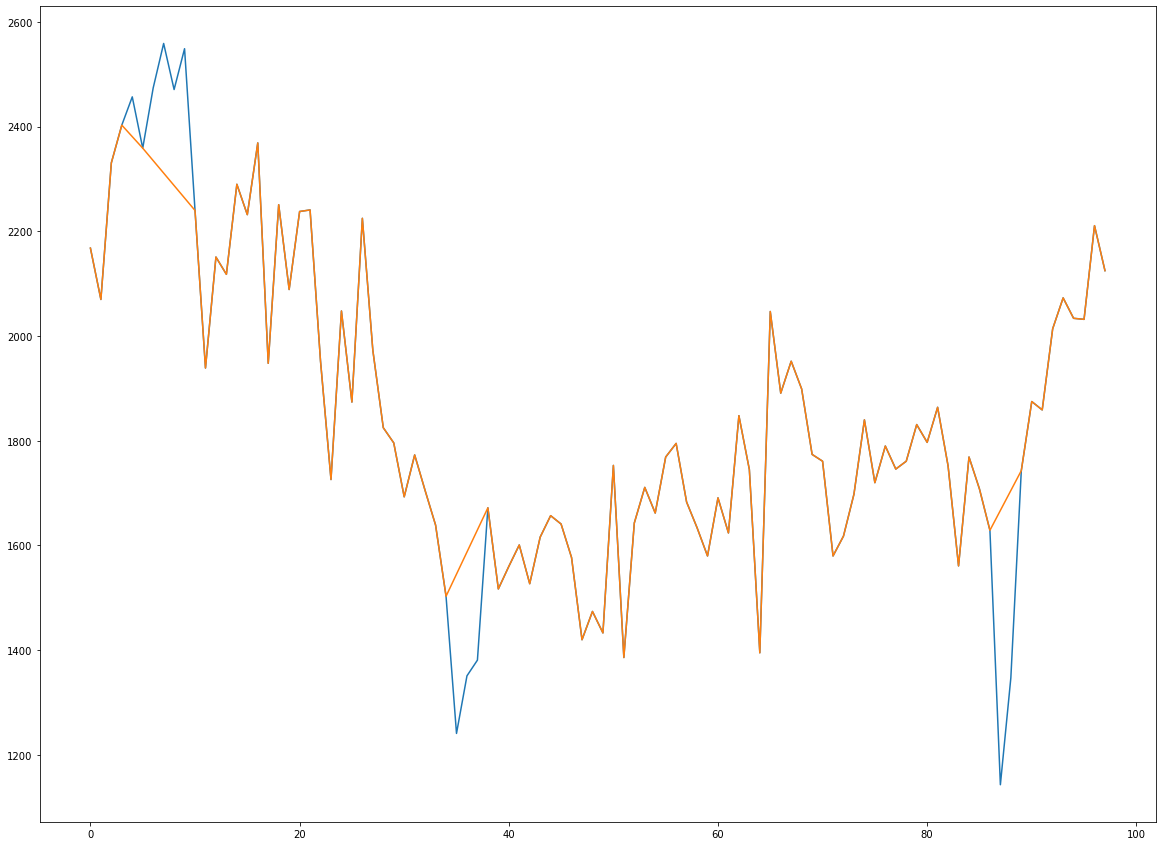

In [162]:
consumo_aparente['Valores'].plot().get_figure()
y[removed_outliers].plot().get_figure()
plt.show()

In [163]:
def detect_outliers(df, n, features):

    outlier_indices = []

    for col in features:

        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)

        IQR = Q3 - Q1
        print('\n',col)

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        print(outlier_list_col)
        outlier_indices.extend(outlier_list_col)
    
    return outlier_indices

In [164]:
lof = ['Valores']
daily_prices_tkm = consumo_aparente[['Datas','Valores']]
Outliers_to_drop = detect_outliers(daily_prices_tkm, 1, lof)
daily_prices_tkm.drop(Outliers_to_drop,inplace=True)

y = consumo_aparente['Valores']

print("Turkey Method, " + str(100-((y[Outliers_to_drop].size/size)*100)) +  " % dados remanescentes do Dataset.")


 Valores
Int64Index([], dtype='int64')
Turkey Method, 100.0 % dados remanescentes do Dataset.


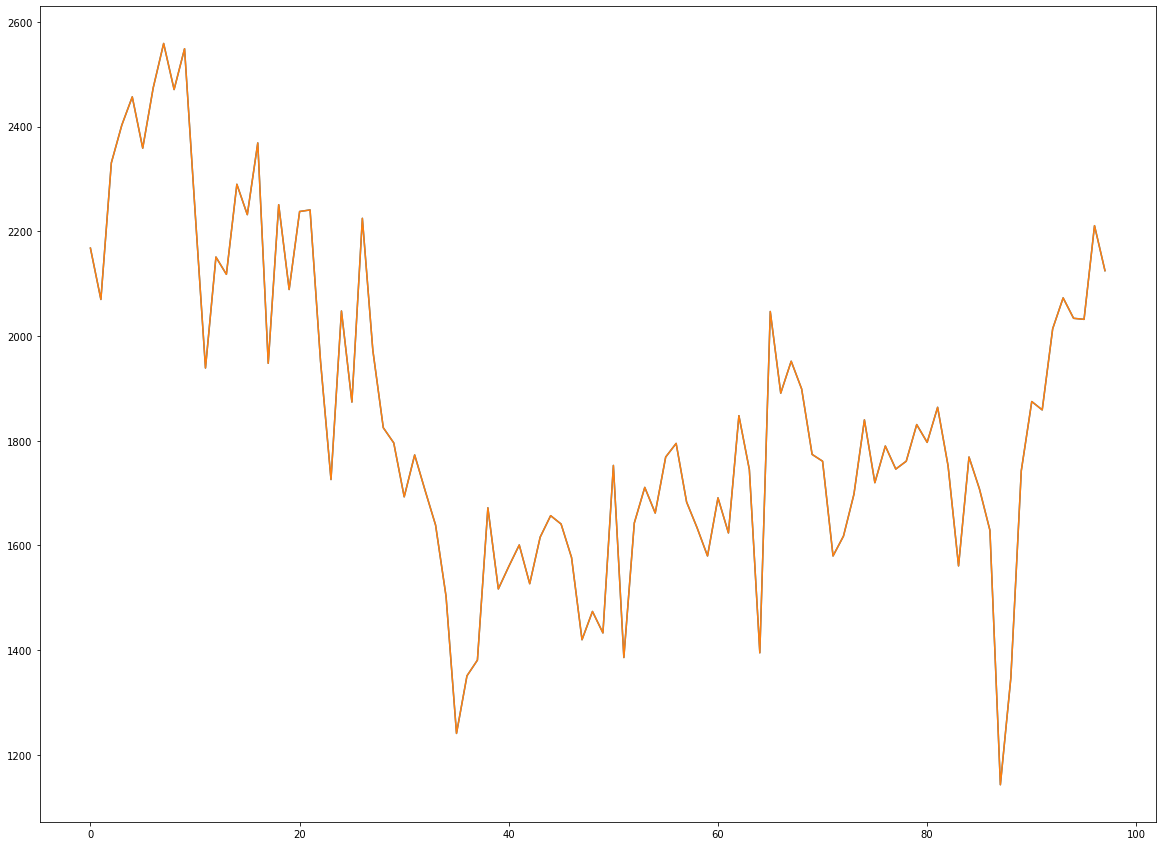

In [165]:
consumo_aparente['Valores'].plot().get_figure()
daily_prices_tkm['Valores'].plot().get_figure()
plt.show()

In [166]:
consumo_aparente.columns

Index(['Datas', 'Valores'], dtype='object')

In [167]:
prior_scale=0.2
daily_prices_prophet = daily_prices_tkm[['Datas', 'Valores']]

m = Prophet(changepoint_prior_scale=prior_scale)
daily_prices_prophet.columns = ['ds','y']
m.fit(daily_prices_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [168]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
458,2022-01-28,1591.576029,1413.063835,1780.489717
459,2022-01-29,1651.322615,1455.401600,1832.874884
460,2022-01-30,1729.603810,1534.018179,1919.576920
461,2022-01-31,1825.295343,1634.519098,2014.646698
462,2022-02-01,1936.732950,1756.698895,2130.294745


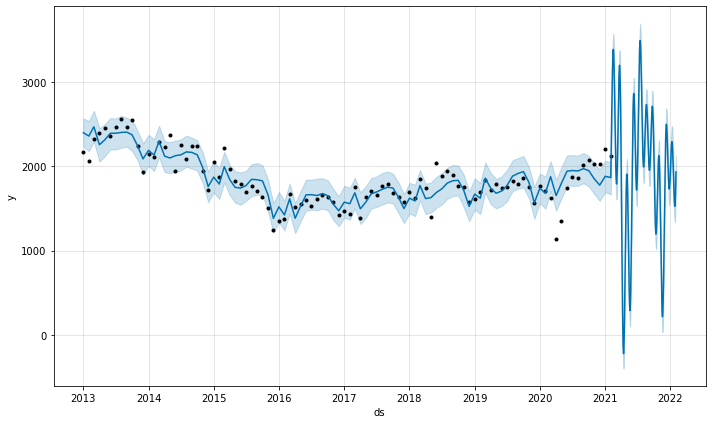

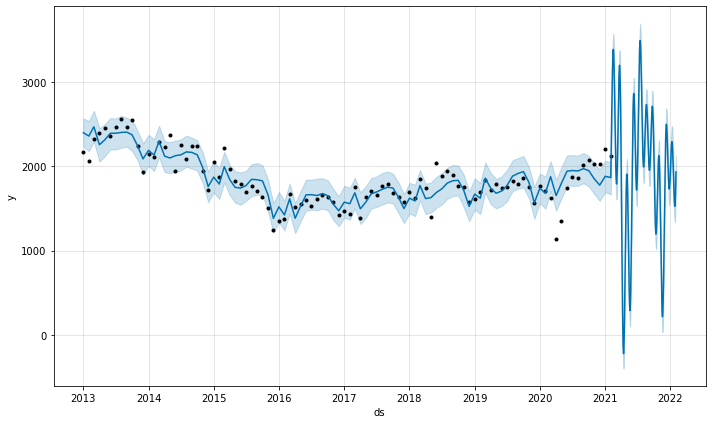

In [169]:
m.plot(forecast)

Projecao de 2020-2022

In [170]:
consumo_aparente.dtypes

Datas      datetime64[ns]
Valores           float64
dtype: object

In [171]:
consumo_aparente_2 = consumo_aparente[consumo_aparente['Datas'] < '01-01-2020']
consumo_aparente_2

,Datas,Valores
0,2013-01-01,2168.0
1,2013-02-01,2070.0
2,2013-03-01,2331.0
3,2013-04-01,2403.0
4,2013-05-01,2457.0
...,...,...
79,2019-08-01,1831.0
80,2019-09-01,1797.0
81,2019-10-01,1864.0
82,2019-11-01,1752.0


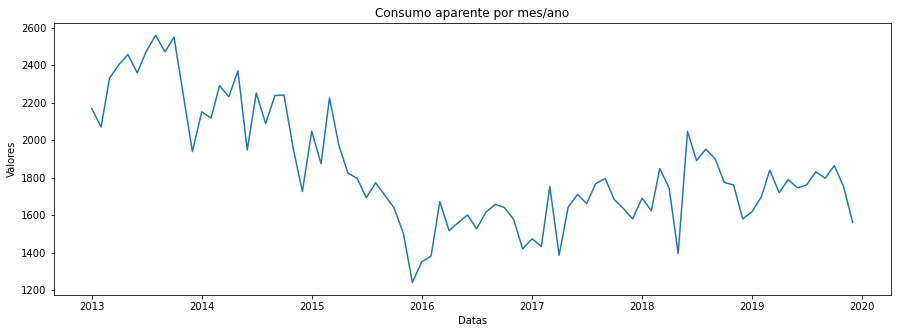

In [172]:
f, axes = plt.subplots(1, figsize=(15,5))

sns.lineplot(x="Datas", y="Valores",data=consumo_aparente_2)

plt.title("Consumo aparente por mes/ano")

plt.show()

In [173]:
daily_prices_remOutliers = consumo_aparente_2[['Datas','Valores']]
size = consumo_aparente_2.size
y = daily_prices_remOutliers['Valores']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

print(str(y[removed_outliers].size) + "/" + str(size) + " dados remanescentes.")

print(str((100-(y[removed_outliers].size/size)*100)) +  " % percentual correspondente.")

74/168 dados remanescentes.
55.952380952380956 % percentual correspondente.


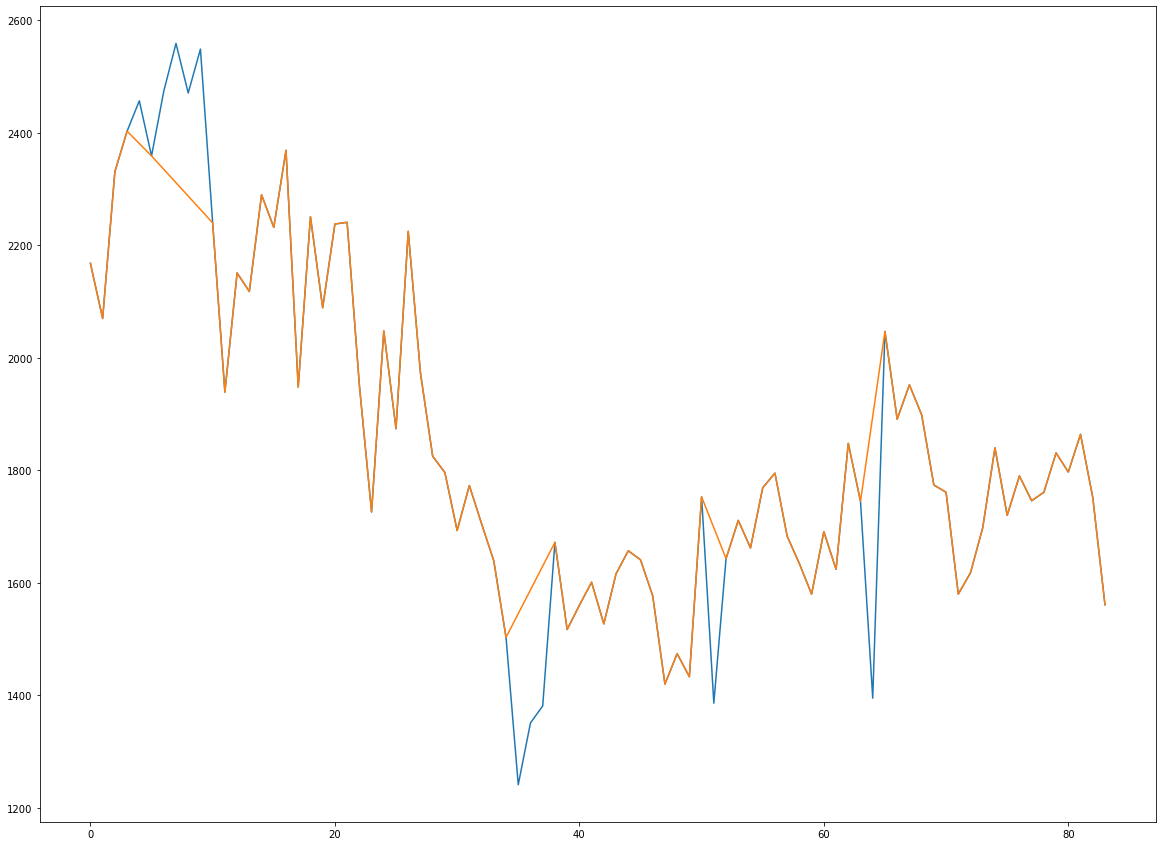

In [174]:
consumo_aparente_2['Valores'].plot().get_figure()
y[removed_outliers].plot().get_figure()
plt.show()

In [175]:
def detect_outliers(df, n, features):

    outlier_indices = []

    for col in features:

        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)

        IQR = Q3 - Q1
        print('\n',col)

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        print(outlier_list_col)
        outlier_indices.extend(outlier_list_col)
    
    return outlier_indices

In [176]:
lof = ['Valores']
daily_prices_tkm = consumo_aparente_2[['Datas','Valores']]
Outliers_to_drop = detect_outliers(daily_prices_tkm, 1, lof)
daily_prices_tkm.drop(Outliers_to_drop,inplace=True)

y = consumo_aparente_2['Valores']

print("Turkey Method, " + str(100-((y[Outliers_to_drop].size/size)*100)) +  " % dados remanescentes do Dataset.")


 Valores
Int64Index([], dtype='int64')
Turkey Method, 100.0 % dados remanescentes do Dataset.


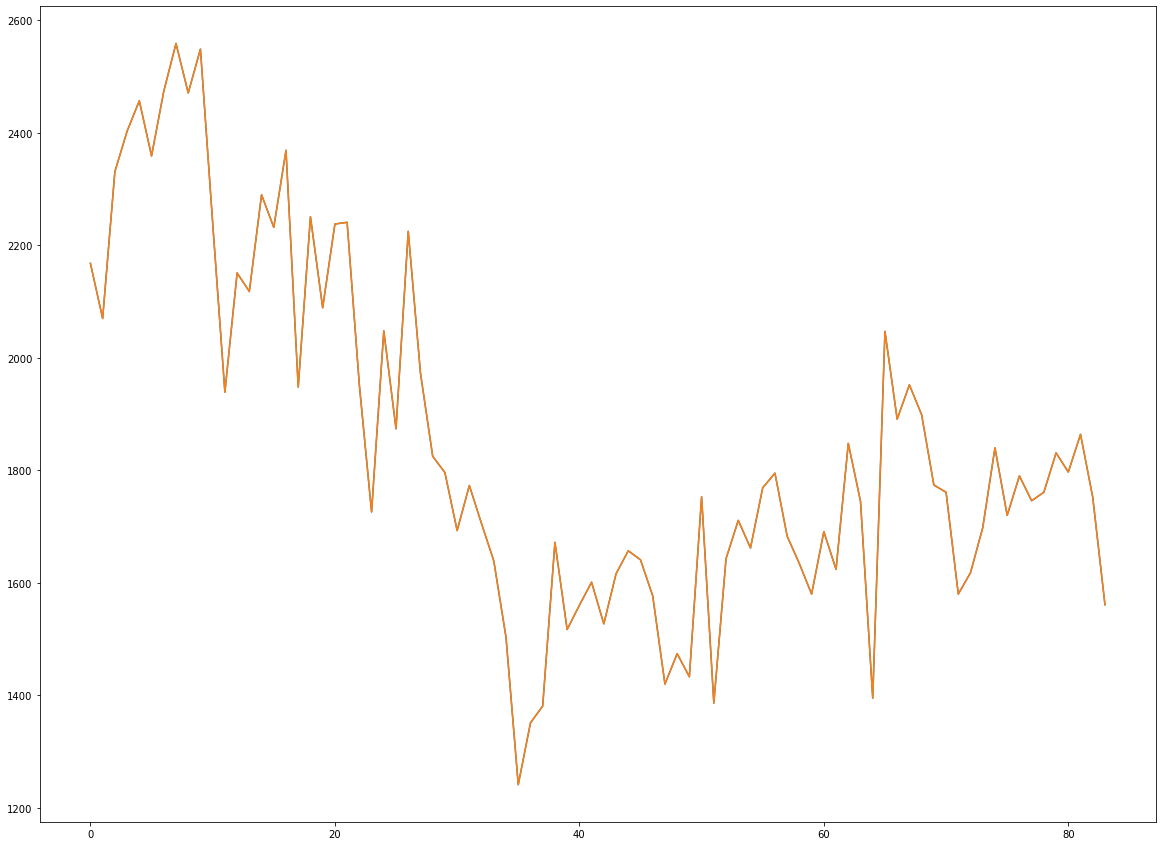

In [177]:
consumo_aparente_2['Valores'].plot().get_figure()
daily_prices_tkm['Valores'].plot().get_figure()
plt.show()

In [178]:
prior_scale=0.2
daily_prices_prophet = daily_prices_tkm[['Datas', 'Valores']]

m = Prophet(changepoint_prior_scale=prior_scale)
daily_prices_prophet.columns = ['ds','y']
m.fit(daily_prices_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [179]:
future = m.make_future_dataframe(periods=1125)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1204,2022-12-26,1804.278407,1316.787911,2282.081217
1205,2022-12-27,1758.493583,1268.105305,2234.026735
1206,2022-12-28,1722.763249,1242.652856,2214.846961
1207,2022-12-29,1698.280336,1204.519380,2171.597772
1208,2022-12-30,1685.912179,1178.720149,2165.597764


In [180]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,2347.956712,2128.039341,2364.924804,2347.956712,2347.956712,-99.949576,-99.949576,-99.949576,-99.949576,-99.949576,-99.949576,0.0,0.0,0.0,2248.007136
1,2013-02-01,2350.676497,2065.021956,2304.277611,2350.676497,2350.676497,-169.003244,-169.003244,-169.003244,-169.003244,-169.003244,-169.003244,0.0,0.0,0.0,2181.673253
2,2013-03-01,2353.133077,2355.421482,2592.441512,2353.133077,2353.133077,117.042838,117.042838,117.042838,117.042838,117.042838,117.042838,0.0,0.0,0.0,2470.175915
3,2013-04-01,2355.852862,2204.815725,2441.831901,2355.852862,2355.852862,-29.093944,-29.093944,-29.093944,-29.093944,-29.093944,-29.093944,0.0,0.0,0.0,2326.758918
4,2013-05-01,2358.484911,2251.604209,2487.057860,2358.484911,2358.484911,11.757224,11.757224,11.757224,11.757224,11.757224,11.757224,0.0,0.0,0.0,2370.242135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2022-12-26,1810.290752,1316.787911,2282.081217,1342.784172,2266.182761,-6.012346,-6.012346,-6.012346,-6.012346,-6.012346,-6.012346,0.0,0.0,0.0,1804.278407
1205,2022-12-27,1810.315504,1268.105305,2234.026735,1342.008622,2266.936115,-51.821921,-51.821921,-51.821921,-51.821921,-51.821921,-51.821921,0.0,0.0,0.0,1758.493583
1206,2022-12-28,1810.340256,1242.652856,2214.846961,1341.233073,2267.689470,-87.577007,-87.577007,-87.577007,-87.577007,-87.577007,-87.577007,0.0,0.0,0.0,1722.763249
1207,2022-12-29,1810.365007,1204.519380,2171.597772,1340.457523,2268.442824,-112.084671,-112.084671,-112.084671,-112.084671,-112.084671,-112.084671,0.0,0.0,0.0,1698.280336


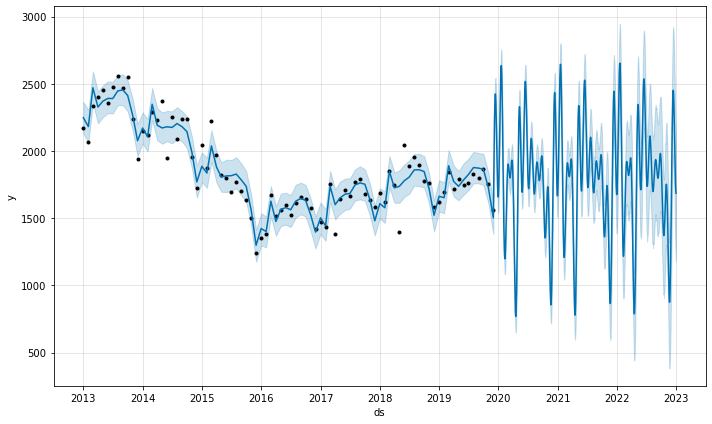

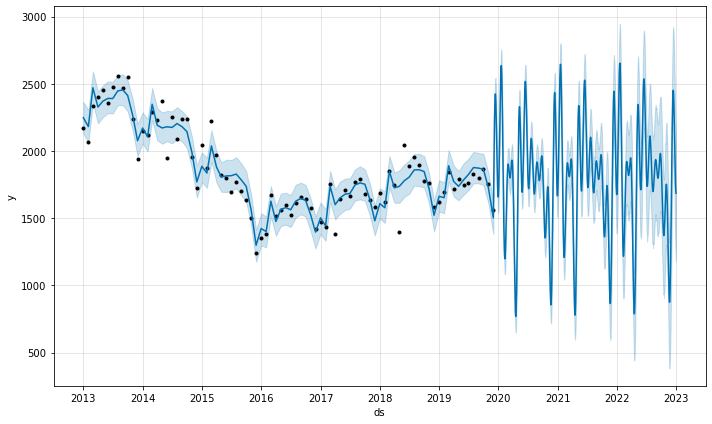

In [181]:
m.plot(forecast)

In [182]:
forecast_filter = forecast[['ds','yhat']]
forecast_filter

,ds,yhat
0,2013-01-01,2248.007136
1,2013-02-01,2181.673253
2,2013-03-01,2470.175915
3,2013-04-01,2326.758918
4,2013-05-01,2370.242135
...,...,...
1204,2022-12-26,1804.278407
1205,2022-12-27,1758.493583
1206,2022-12-28,1722.763249
1207,2022-12-29,1698.280336


In [183]:
consumo_aparente

,Datas,Valores
0,2013-01-01,2168.0
1,2013-02-01,2070.0
2,2013-03-01,2331.0
3,2013-04-01,2403.0
4,2013-05-01,2457.0
...,...,...
93,2020-10-01,2073.0
94,2020-11-01,2034.0
95,2020-12-01,2032.0
96,2021-01-01,2211.0


In [184]:
forecast_filter = forecast_filter.rename(columns={'ds':'Datas', 'yhat':'Valores'}, errors="raise")

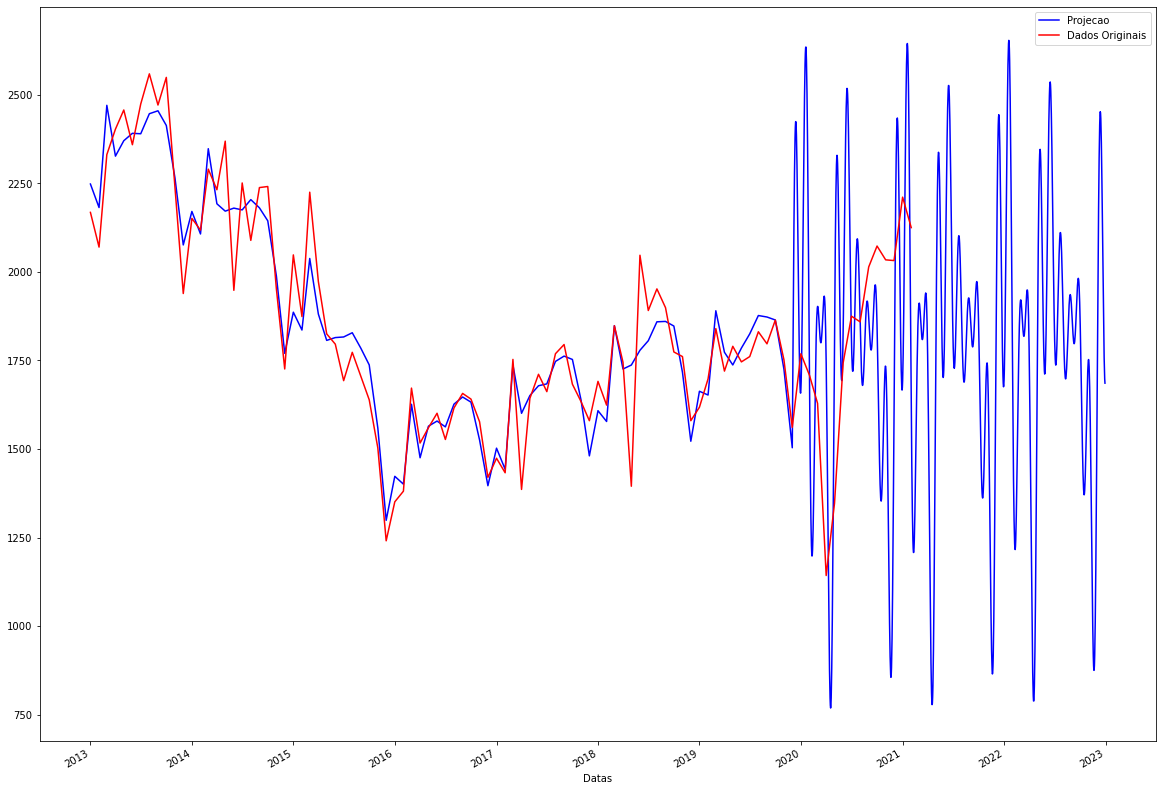

In [185]:
ax = forecast_filter.plot(kind="line", x="Datas",y="Valores", color="b", label="Projecao")

consumo_aparente.plot(kind="line", x="Datas",y="Valores", color="r", label="Dados Originais", ax = ax)

plt.show()